<a href="https://colab.research.google.com/github/myeongseop2/NIDS_project/blob/main/BruteForce/cic_ids_ddos_brute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ids/02-14-2018.csv")

In [ ]:
#df2 = pd.read_csv("/content/drive/MyDrive/ids/02-20-2018.csv")

In [ ]:
 df3 = pd.read_csv("/content/drive/MyDrive/ids/02-21-2018.csv")

In [ ]:
 df.shape

(1048575, 80)

In [ ]:
 df3.shape

(1048575, 80)

In [ ]:
df["Label"].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [ ]:
df3["Label"].value_counts()

DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: Label, dtype: int64

In [ ]:
result = pd.concat([df, df3])
result.shape

(2097150, 80)

In [ ]:
result['Label'].value_counts()

Benign                  1028459
DDOS attack-HOIC         686012
FTP-BruteForce           193360
SSH-Bruteforce           187589
DDOS attack-LOIC-UDP       1730
Name: Label, dtype: int64

In [ ]:
result.isnull().sum().sum()

2277

In [ ]:
data = result.dropna()

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(2094873, 80)

In [ ]:
data["Label"].value_counts()

Benign                  1026188
DDOS attack-HOIC         686012
FTP-BruteForce           193354
SSH-Bruteforce           187589
DDOS attack-LOIC-UDP       1730
Name: Label, dtype: int64

In [ ]:
data.duplicated().sum()

243185

In [ ]:
data.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.shape

(1851688, 80)

In [ ]:
data["Label"].value_counts()

Benign                  1024829
DDOS attack-HOIC         668461
SSH-Bruteforce           117322
FTP-BruteForce            39346
DDOS attack-LOIC-UDP       1730
Name: Label, dtype: int64

In [ ]:
#DDOS : 670191
#BruteForce : 156668
# df11 = data[data["Label"] == "Benign"][:156668]
# df22 = data[data["Label"] == "DDOS attack-HOIC"][:154938]
# df33 = data[data["Label"] == "DDOS attack-LOIC-UDP"]
# df44 = data[data["Label"] == "SSH-Bruteforce"][:117322]
# df55 = data[data["Label"] == "FTP-BruteForce"]
df11 = data[data["Label"] == "Benign"][:10000]
df22 = data[data["Label"] == "DDOS attack-HOIC"][:9000]
df33 = data[data["Label"] == "DDOS attack-LOIC-UDP"][:1000]
df44 = data[data["Label"] == "SSH-Bruteforce"][:5000]
df55 = data[data["Label"] == "FTP-BruteForce"][:5000]

In [ ]:
df = pd.concat([df11, df22, df33, df44, df55], axis = 0)

In [ ]:
df["Label"].value_counts()

Benign                  156668
DDOS attack-HOIC        154938
SSH-Bruteforce          117322
FTP-BruteForce           39346
DDOS attack-LOIC-UDP      1730
Name: Label, dtype: int64

In [ ]:
df[['Date', 'Time']] = df['Timestamp'].str.split(expand=True)

In [ ]:
df = df.drop('Timestamp', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df['Time'] = df['Time'].str.replace(':', '')
df['Date'] = df['Date'].str.replace('/', '')

In [ ]:
df = df.astype({'Time' : 'int'})
df = df.astype({'Date' : 'int'})

In [ ]:
label_ = []

for at in df['Label']:
    if at == 'Benign':
        temp = 0
    elif at == 'DDOS attack-HOIC':
        temp = 1
    elif at == 'DDOS attack-LOIC-UDP':
        temp = 1
    else:
        temp = 2
    label_.append(temp)

In [ ]:
df["label"] = label_

In [ ]:
df.drop(['Label'], axis = 1, inplace = True)

In [ ]:
df['label'].value_counts()

0    156668
1    156668
2    156668
Name: label, dtype: int64

In [ ]:
import numpy as np

#columns_to_drop = ['Flow Byts/s', 'Flow Pkts/s']
max_flow_bytes = df.loc[df['Flow Byts/s'] != np.inf, 'Flow Byts/s'].max()
max_flow_pkts = df.loc[df['Flow Pkts/s'] != np.inf, 'Flow Pkts/s'].max()

print(max_flow_bytes, max_flow_pkts)

422631578.947368 3000000.0


In [ ]:
#df.drop(columns=columns_to_drop, inplace = True)

df['Flow Byts/s'].replace(np.inf, max_flow_bytes + 1, inplace = True)
df['Flow Pkts/s'].replace(np.inf, max_flow_pkts + 1, inplace = True)

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)

In [ ]:
#삭제할 특징
del_col = ['Flow Duration',
 'Flow IAT Mean',
 'Fwd Pkt Len Std',
 'ACK Flag Cnt',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Pkt Len Min',
 'Bwd Pkt Len Min',
 'Bwd Pkts/b Avg',
 'Bwd PSH Flags',
 'Fwd Pkts/s',
 'Fwd URG Flags',
 'Idle Mean',
 'Bwd Byts/b Avg',
 'Bwd Blk Rate Avg',
 'URG Flag Cnt',
 'Fwd PSH Flags',
 'Bwd Pkt Len Mean',
 'Bwd Pkts/s',
 'Idle Min',
 'Fwd Pkt Len Min',
 'Down/Up Ratio',
 'Flow IAT Std',
 'Bwd IAT Tot',
 'Bwd Seg Size Avg',
 'Flow Pkts/s',
 'Flow IAT Min',
 'Pkt Len Max',
 'Active Mean',
 'Fwd Byts/b Avg',
 'Flow IAT Max',
 'Fwd IAT Max',
 'Pkt Size Avg',
 'Fwd Blk Rate Avg',
 'Flow Byts/s',
 'Pkt Len Mean',
 'Idle Std',
 'Fwd IAT Min',
 'Active Max',
 'Bwd IAT Min',
 'Fwd IAT Tot',
 'Bwd URG Flags',
 'Fwd IAT Mean',
 'FIN Flag Cnt',
 'Fwd IAT Std',
 'Active Min',
 'Fwd Pkt Len Mean',
 'SYN Flag Cnt',
 'Pkt Len Var',
 'Bwd Pkt Len Max',
 'CWE Flag Count',
 'PSH Flag Cnt',
 'Pkt Len Std',
 'Fwd Pkts/b Avg',
 'Idle Max',
 'Bwd IAT Max',
 'Protocol',
 'Fwd Seg Size Avg',
 'Active Std']

In [ ]:
df = df.drop(del_col, axis = 1)

In [ ]:
df

,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Std,Fwd Header Len,Bwd Header Len,RST Flag Cnt,...,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Date,Time,label
487140,80,4,4,97,232,97,116.00000,92,92,0,...,97,4,232,8192,141,1,20,14022018,100737,0
259628,22,22,22,1944,2665,640,258.64156,712,712,0,...,1944,22,2665,26883,230,16,32,14022018,24710,2
73629,80,2,0,0,0,0,0.00000,40,0,0,...,0,0,0,32738,-1,0,20,21022018,21240,1
131380,21,1,1,0,0,0,0.00000,40,20,0,...,0,1,0,26883,0,0,40,14022018,113921,2
102483,80,3,4,309,935,309,467.50000,72,92,1,...,309,4,935,65535,219,1,20,21022018,21316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232508,22,1,1,0,0,0,0.00000,32,32,0,...,0,1,0,241,230,0,32,14022018,22033,2
208371,22,22,22,1976,2665,640,258.64156,712,712,0,...,1976,22,2665,26883,230,16,32,14022018,22230,2
124567,80,3,4,311,935,311,467.50000,72,92,1,...,311,4,935,65535,219,1,20,21022018,21343,1
59899,21,1,1,0,0,0,0.00000,40,20,0,...,0,1,0,26883,0,0,40,14022018,110327,2


In [ ]:
data, target = df.drop(columns = ['label']), df['label']

In [ ]:
print(data.shape, target.shape)

(470004, 21) (470004,)


In [ ]:
#num_col = list(set(data.columns))
#사용할 특징
num_col = ['Date',
 'Fwd Seg Size Min',
 'Dst Port',
 'Init Fwd Win Byts',
 'Bwd Header Len',
 'Fwd Header Len',
 'Time',
 'Fwd Act Data Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Tot Bwd Pkts',
 'Tot Fwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Init Bwd Win Byts',
 'Subflow Bwd Byts',
 'Subflow Fwd Pkts',
 'ECE Flag Cnt',
 'RST Flag Cnt',
 'Fwd Pkt Len Max',
 'Bwd Pkt Len Std']

In [ ]:
len(num_col)

21

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(data[num_col])
data[num_col] = scaler.transform(data[num_col])

In [ ]:
data.head()

,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Std,Fwd Header Len,Bwd Header Len,RST Flag Cnt,...,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Date,Time
487140,0.001221,0.000010,0.000440,0.000010,0.000018,0.001505,0.143436,0.000037,0.000506,0.0,...,0.000010,0.000010,0.000440,0.000018,0.125015,0.002167,0.000003,0.416667,0.562775,0.782499
259628,0.000336,0.000068,0.002422,0.000196,0.000202,0.009932,0.319815,0.000287,0.003919,0.0,...,0.000068,0.000196,0.002422,0.000202,0.410217,0.003525,0.000052,0.666667,0.562775,0.126856
73629,0.001221,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000000,0.0,...,0.000003,0.000000,0.000000,0.000000,0.499557,0.000000,0.000000,0.416667,1.000000,0.096932
131380,0.000320,0.000000,0.000110,0.000000,0.000000,0.000000,0.000000,0.000016,0.000110,0.0,...,0.000000,0.000000,0.000110,0.000000,0.410217,0.000015,0.000000,0.833333,0.562775,0.896195
102483,0.001221,0.000006,0.000440,0.000031,0.000071,0.004795,0.578073,0.000029,0.000506,1.0,...,0.000006,0.000031,0.000440,0.000071,1.000000,0.003357,0.000003,0.416667,1.000000,0.097587


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, stratify = target, random_state = 22)

In [ ]:
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_test.shape)

(329002, 21)
(141002,)
(141002, 21)
(141002,)


In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_test.shape)

(329002, 21)
(141002, 3)
(141002, 21)
(141002, 3)


In [ ]:
#중간 저장
x_train.to_csv("/content/drive/MyDrive/ids/bf_ddos_data/x_train.csv", index=False)
y_train.to_csv("/content/drive/MyDrive/ids/bf_ddos_data/y_train.csv", index=False)
x_test.to_csv("/content/drive/MyDrive/ids/bf_ddos_data/x_test.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/ids/bf_ddos_data/y_test.csv", index=False)

AttributeError: ignored

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

forest = RandomForestClassifier(n_estimators=1000,random_state=0, max_depth=1, max_features='auto')

forest.fit(x_train,y_train)

print("특성 중요도 : \n{}".format(forest.feature_importances_))

특성 중요도 : 
[0.079 0.001 0.    0.034 0.037 0.034 0.027 0.014 0.002 0.    0.003 0.007
 0.    0.002 0.011 0.    0.002 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.005 0.004 0.005 0.006 0.    0.    0.    0.    0.    0.06
 0.062 0.001 0.001 0.001 0.007 0.002 0.004 0.005 0.    0.    0.015 0.001
 0.    0.    0.    0.016 0.    0.003 0.001 0.009 0.    0.    0.    0.
 0.    0.    0.022 0.046 0.041 0.023 0.072 0.024 0.05  0.098 0.    0.
 0.    0.    0.    0.    0.    0.    0.103 0.06 ]


In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))

훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.986


In [ ]:
def plt_feature(model):
    # 배열형태로 반환
    ft_importance_values = model.feature_importances_

    # 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft = ft_series.sort_values(ascending=False)

    plt.figure(figsize=(6,15))
    plt.title("feature importance")
    sns.barplot(x=ft, y=ft.index)

    plt.show()

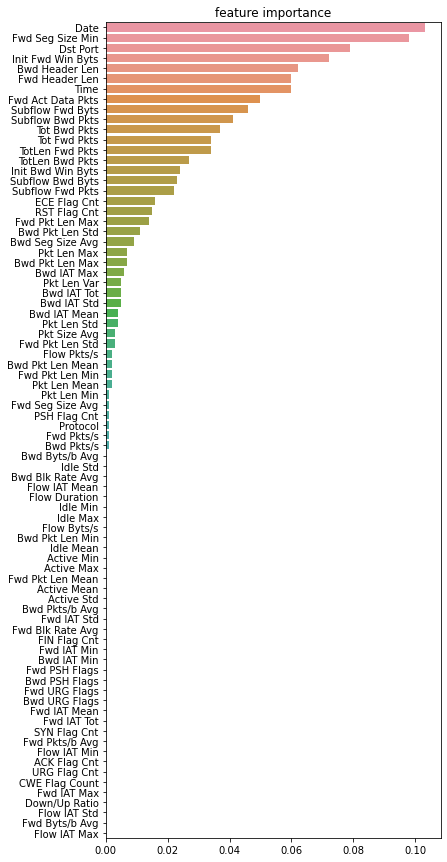

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt_feature(forest)

In [ ]:
forest_1 = RandomForestClassifier(n_estimators=100,random_state=0)

forest_1.fit(x_train,y_train)

print("특성 중요도 : \n{}".format(forest_1.feature_importances_))

특성 중요도 : 
[1.01456619e-01 1.29386585e-03 2.87048849e-03 2.93826555e-02
 1.71366714e-02 1.74642434e-02 8.53562407e-03 7.62767985e-03
 1.52278507e-03 7.50303285e-03 3.65906947e-03 6.07369610e-03
 4.28938704e-03 3.28462498e-03 1.88626123e-03 1.53786533e-03
 3.47807592e-02 1.02424323e-03 4.95356424e-04 1.83957324e-03
 5.51268360e-04 1.29983909e-03 3.86550498e-04 3.14921464e-04
 1.49736032e-03 7.06528433e-04 6.45009279e-03 2.97204076e-03
 1.74636313e-03 4.80107868e-03 9.20966948e-04 1.10767641e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.84510668e-02
 2.87362315e-02 3.41024324e-02 3.15312412e-02 3.24803172e-04
 9.27171545e-03 1.11028998e-02 1.15847228e-02 7.06660736e-03
 2.45724458e-05 2.20134791e-05 1.14375918e-02 3.75463350e-04
 7.24519146e-04 1.56557665e-03 0.00000000e+00 7.00043181e-03
 1.95347066e-03 9.32871761e-03 1.64242737e-03 1.18384172e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.88498372e-02 1.96250290e-02
 1.80407020e-0

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest_1.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest_1.score(x_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000


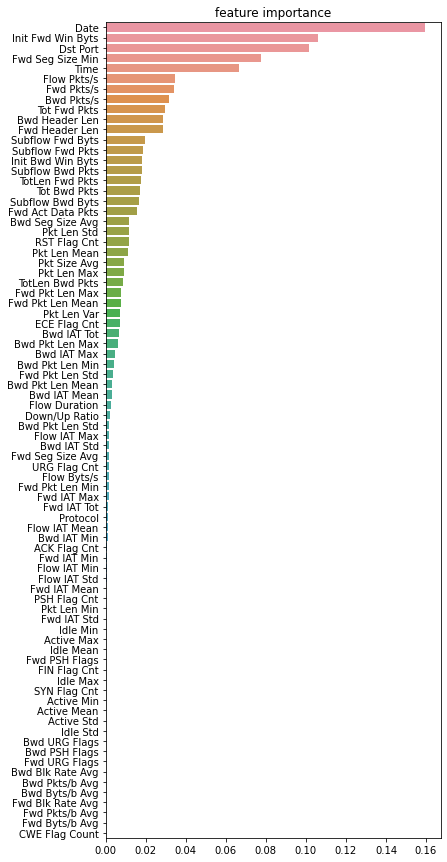

In [ ]:
plt_feature(forest_1)

In [ ]:
num = ['Date',
 'Fwd Seg Size Min',
 'Dst Port',
 'Init Fwd Win Byts',
 'Bwd Header Len',
 'Fwd Header Len',
 'Time',
 'Fwd Act Data Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Tot Bwd Pkts',
 'Tot Fwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Init Bwd Win Byts',
 'Subflow Bwd Byts',
 'Subflow Fwd Pkts',
 'ECE Flag Cnt',
 'RST Flag Cnt',
 'Fwd Pkt Len Max',
 'Bwd Pkt Len Std']